## Chapter 2. Basic linear models

### 2.1. Putting it all together

In this chapter we demonstrate how to formulate and solve the complete scheduling problem for next Monday. We start by representing the model in purely mathematical notation. Recall that our model consists of three major components: decision variables, an objective function on those variables, and a set of constraints relating and limiting the activities prescribed by the variables.

$$\max z = 1.5 x_s + x_w + 2 x_l$$
$$x_s + x_w + x_l = 24$$
$$10 \le x_w \le 24$$
$$7 \le x_s \le 24$$
$$0 \le x_l \le 24$$

This is nothing more than a consolidated form of the equations and inequalities we wrote in the last chapter. We have three variables, corresponding to the amount of time we sleep, work, and play during the course of a day. Each activity has a different per-hour payoff, or _utility_. We maximize the total utility of our schedule such that our schedule comprises exactly 24 hours, and we respect certain minimum hours of activity.

The resulting formulation is a very simple example of a _linear model_. In much of the literature on decision making, this is referred to as a _linear program_, but the term _program_ has become a confusing historical anachronism which we shall avoid. The important part is not its name but its structure. Any mathematical model that exhibits the same set of certain characteristics will also be a linear model. So let's state in high-level terms what those characteristics are.

* A finite set of variables that take real values. This means that we have a known number of decision variables that are _continuous_. That is, they can take values over some range and anywhere in between. We can sleep for 7 hours, 8 hours, 8.5 hours, 8.25 hours, and so on. Any division of that time is possible. We'll usually assume that our decision variables are nonnegative. In specific cases we may also state that they are _unrestricted in sign_ (urs).<br><br>
* An objective function which is some _linear combination_ of these variables. The function can either minimize or maximize, and it need not include every variable. This translates to the sum of each variable and a known coefficient. It can also be thought of as the _dot product_ of a real-valued vector and our vector of decision variables.<br><br>
* A set of constraints which are linear equalities or inequalities of the decision variables. These constraints can take any of the three forms $=$, $\le$, or $\ge$. We'll see that these forms are equivalent in short order.

These characteristics combine to give us a general form for linear models. Any linear optimization problem can be stated mathematically with the following structure, where $c$ and $b$ are known vectors of reals, $x$ is a vector of decision variables, and $A$ is a known matrix of reals.

$$\max c^\intercal x$$
$$A x = b$$
$$x \ge 0$$

We won't worry about the particular dimensions of our model at the moment. The important thing to note is that our scheduling problem is written can be written in this form. Thus it is one instance of the set of linear models. Further, there are infinitely many possible versions of our scheduling problem, and each one is itself a linear model.

Thinking about the algebraic structure of our problem in this manner allows us to effectively separate data from logic. This makes our model more powerful. It enables us to gain insights about our problem that we might not otherwise be able to. It also means that we can reuse any existing tools and techniques that apply to the class _(or classes)_ that our probem belongs to.

The ability to thing about the general structures of problems instead of their individual implementations is key to building successful models. A good model can be used to reason about general classes of problems and used to provide decision making guidance. Thus the real meat of modeling is often in formulation.

As a brief aside, recall that our scheduling problem has constraints of the form $a_i^\intercal x = b_i$ and $a_i^\intercal x \le b_i$. We state that the forms $\le$, $\ge$ and $=$ are equivalent. Why is this so?

Say we have some linear inequality $a_i^\intercal x \le b_i$ in a model, and a feasible solution $\bar{x}$ to that model. Since $\bar{x}$ is feasible, we know it must satisfy the inequality. Thus there are two options. Either $a_i^\intercal \bar{x} = b_i$ or $a_i^\intercal \bar{x} < b_i$. In the former case, the constraint is _binding_, and we can simply represent it using an $=$ sign. In the latter, it is _nonbinding_ and we have some amount of positive _slack_ between $a_i^\intercal \bar{x}$ and $b_i$. Thus, in either case there must be some value $s_i \ge 0$ such that $a_i^\intercal \bar{x} + s_i = b_i$.

In the case of inequalities of the form $a_j^\intercal x \ge b_j$, we make the same argument in the opposite direction. For any feasible $\bar{x}$ we can add a variable $e_j \ge 0$ such that $a_j^\intercal \bar{x} - e_j = b_j$. $e_j$ represents the amount of excess we have with respect to the constraint. $s_i$ and $e_j$ are simply extra nonnegative decision variables that we add in with our existing variables which convert inequalities into equalities. We can think of them as the decisions to not be bound by certain constraints. For instance, we may decide to sleep more than our minimum required amount. The decision would result in a schedule with excess sleep, which actually sounds rather nice.

#### Introducing PuLP

It's time to take our purely mathematical scheduling model and solve it on a computer. To do this we'll use the Python library PuLP, which provides a clean interface for linear model with both open source and commercial linear optimizers. A linear optimizer is a program that takes a model definition and its associated data as input, and provides an optimal solution as output.

There are a number of optimizers available, and the choice of optimizer depends on one's needs. Some of the better known open source linear optimizers include the GNU Linear Programming Kit (GLPK), COIN-OR Linear Programming (CLP), and lpsolve. Open source solvers are nice since they are free and provide their source code, but do not typically perform as well as commercial solvers, such as CPLEX, Gurobi, Sulum, MOSEK, and others. 

Each solver has different strengths and a different modeling interface, so a nice thing about a tool like PuLP is that it abstracts the ability to model across many solvers. This allows us to focus on modeling instead of logistical issues of targeting individual solvers. All the linear model examples in this book are intended to run using either GLPK or CLP. But they can just as easily be run with any other solver that PuLP supports.

Below we give our implementation of the model in PuLP. Its structure is very similar to our mathematical formulations of the same model. We create a problem called `schedule` which attempts to maximize an objective called `happiness`. Our decision variables are defined as Python variables with the names `sleep`, `work`, and `lesiure`. Lower and upper bounds for these variables are passed as the second and third arguments to `pulp.LpVariable`, respectively.

In [1]:
import pulp

schedule = pulp.LpProblem('Schedule for next Monday', pulp.LpMaximize)

# Define a decision variable for each activity.
sleep = pulp.LpVariable('sleep', 7, 24)
work = pulp.LpVariable('work', 10, 24)
leisure = pulp.LpVariable('leisure', 0, 24)

# Our objective is to maximize happiness.
happiness = 1.5*sleep + work + 2*leisure
schedule.setObjective(happiness)

# There are only 24 hours in next Monday.
schedule += sleep + work + leisure == 24

# Look for the best solution.
status = schedule.solve()
if status == pulp.LpStatusOptimal:
    print('Optimal schedule:')
    print('    happiness =', pulp.value(happiness))
    print('    work      =', pulp.value(work))
    print('    sleep     =', pulp.value(sleep))
    print('    leisure   =', pulp.value(leisure))

Optimal schedule:
    happiness = 34.5
    work      = 10.0
    sleep     = 7.0
    leisure   = 7.0


The model is solved by calling `schedule.solve`. The return value of this is a status, which can be a number of things. We'll get into what those statuses are later, but for now we'll only be interested in optimal solutions. These are indicated by a status of `pulp.LpStatusOptimal`. If we receive that status, we know we have a schedule that maximizes our happiness, and we can use `pulp.value` to get the values of our decision variables.

As shown above, our scheduling model does not separate its structure from its data. If we want to add a variable or update a coefficient, we have to do so directly in the model code. It would be nice to instead have a version that represents the structure independent from the model data.

Below, we revise the same model so that it represents the problem structure independent of its data. In this case, we construct and solve scheduling models inside a function `scheule`, which accepts three lists of activity names, their associated minima, and their utility.

In [2]:
def schedule(activities, required_hours, happiness_per_hour):
    # The structure of our problem is the same regardless of activities.
    prob = pulp.LpProblem('Schedule problem', pulp.LpMaximize)
    
    # Define a decision variable for each activity.
    x = []
    for a, lb in zip(activities, required_hours):
        x.append(pulp.LpVariable(a, lb, 24))
    
    # Our objective is to maximize happiness.
    happiness = pulp.lpDot(happiness_per_hour, x)
    prob.setObjective(happiness)
    
    # There are only 24 hours in next Monday.
    prob += pulp.lpSum(x) == 24
    
    # Look for the best solution. If we don't find it, raise an error.
    assert prob.solve() == pulp.LpStatusOptimal
    return pulp.value(happiness), [(xa.name, pulp.value(xa)) for xa in x]

# Parameters of the problem are all defined here.
schedule(
    ['sleep', 'work', 'leisure'], 
    [7, 10, 0], 
    [1.5, 1, 2]
)

(34.5, [('sleep', 7.0), ('work', 10.0), ('leisure', 7.0)])

We see the strength of this type of model formulation when we try to add an extra activity. Below, we add `chores` to our schedule, which we are required to do at least an hour of each day. We really hate doing chores, so we'll say each hour spent doing them takes away three units of happiness. Intuitively, the optimal solution to this schedule has us doing the minimum amount of chores, given that they make us so miserable.

In [3]:
schedule(
    ['sleep', 'work', 'leisure', 'chores'],
    [7, 10, 0, 1], 
    [1.5, 1, 2, -3]
)

(29.5, [('sleep', 7.0), ('work', 10.0), ('leisure', 6.0), ('chores', 1.0)])

### 2.2. Infeasibility & unboundedness

So far we have assumed that our model is feasible. That is, we believe that there exist solutions which satisfy our constraints. This is obviously a naive assumption. It is trivial to construct a version of the schedule model that requires more hours a day than exist. For instance, the following model requires that we sleep 10 hours, work 12 hours, enjoy 3 hours of leisure, and suffer through 2 hours of chores. This amounts to 27 hours, Given that there are only 24 hours in a day, we can consider ourselves well overbooked! Models of this type, where no answer exists that satisfy their constraints, are known as _infeasible_. The can't be optimized because they have no solutions.

In [4]:
try:
    schedule(
        ['sleep', 'work', 'leisure', 'chores'],
        [10, 12, 3, 2], 
        [1.5, 1, 2, -3]
    )
except AssertionError:
    print('Optimal schedule not found.')

Optimal schedule not found.


Infeasibility can be a complex thing. Models that have a lot of constraints may contain complex and hard to understand interactions. However, the concept is simple enough. A simpler model illustrates the issue well. Here we have two variables that take values between 0 and 1. We require the sum of these two variables to be at least three. Since it is impossible for them to add to more than 2, the model cannot be feasible. 

In [5]:
infeasible_prob = pulp.LpProblem('Infeasible problem')

x1 = pulp.LpVariable('x1', 0, 1)
x2 = pulp.LpVariable('x2', 0, 1)
    
infeasible_prob += x1 + x2 >= 3

infeasible_prob.solve() == pulp.LpStatusInfeasible

True

There are actually a number of states a linear model may take. So far we have seen models that are feasible with an optimal solution and models that are infeasible and therefore have no solution. It is also possible that a model is feasible but has no optimal solution. This situation is called _unboundedness_ and occurs when some action that gives us a payoff has no limit. That is, say we sell widgets and can get \$1 for each widget we sell. There is no limit on the number of widgets that can be sold, and they cost nothing, or at least less than \$1, to produce. Obviously, we should produce an infinite number of widgets and then have more money than exists in the world.

Clearly, this is ridiculous. Discovering a model is unbouded is often an indication of a structural problem. If one can produce an infinite amount of profit, then there must be a missing constraint! The example below demonstrates the issue simply. $x_1$ and $x_2$ can increase arbitrarily so long as $x_1 - x_2 \le 1$. As we can see in this example and the ones before it, PuLP detects conditions such as infeasibility and unboundedness and informs us of them using the status returned by `LpProblem.solve`. It is a good practice to always check this status before asking PuLP for the values of decision variables and objective functions.

In [6]:
unbounded_prob = pulp.LpProblem('Unbounded problem', pulp.LpMaximize)

x1 = pulp.LpVariable('x1', lowBound=0)
x2 = pulp.LpVariable('x2', lowBound=0)

unbounded_prob.setObjective(x1 + x2)
unbounded_prob += x1 - x2 <= 1

unbounded_prob.solve() == pulp.LpStatusUnbounded

True

### 2.3. Linear models with multiple optima

So far we have seen linear models which have no solution and models which have solutions but no optimal solution. However, these are not the only ways that linear models can misbehave. It is also possible for them to have multiple optimal solutions. Specifically, this happens when the objective function is parallel to a constraint along which the model's optimal solutions lie. If that constraint defines more than a point in the feasible region, then there will be infinitely many feasible solutions with the same objective value.

The following example illustrates a model with multiple optima. It has three constraints. The border of the second of these, $x + y = 2$, is parallel to its objective function, $x + y$, as they are multiples of each other with respect to $x$ and $y$.

In [7]:
multi_prob = pulp.LpProblem('Problem with multiple optimal solutions')

x = pulp.LpVariable('x', 0)
y = pulp.LpVariable('y', 0)

z = x + y
multi_prob.setObjective(z)
multi_prob += x + 3*y >= 3
multi_prob += x + y >= 2
multi_prob += 3*x + y >= 3

assert multi_prob.solve() == pulp.LpStatusOptimal
print('x =', pulp.value(x))
print('y =', pulp.value(y))
print('z =', pulp.value(z))

x = 1.5
y = 0.5
z = 2.0


Solving this model gives us values of $x = 1.5$ and $y = 0.5$ that sum to $z = 2$. If we add an additional constraint that cuts off this solution, we see that we can get the same objective from $x = y = 1$. This means that an entire segment of the hyperplane $x + y = 2$ is optimal, yielding an infinite number of possible optimal solutions.

In [8]:
multi_prob += x == 1

assert multi_prob.solve() == pulp.LpStatusOptimal
print('x =', pulp.value(x))
print('y =', pulp.value(y))
print('z =', pulp.value(z))

x = 1.0
y = 1.0
z = 2.0


#### The geometry of simple linear models

$$x - 2 y \le 3$$
$$0 \le x \le 3$$
$$0 \le y$$

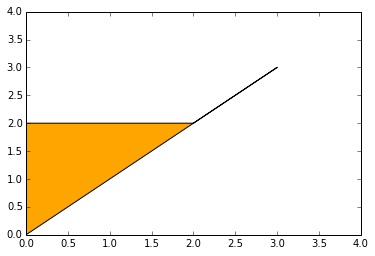

### 2.4 Solving linear models

#### Simplex in brief

#### A few notes about solvers

### References